# Universal Approximation Theorem

Universal Approximation Theorem이란 1개의 비선형 Activation함수를 포함하고 있는 히든 레이어를 가진 Neural Network를 이용해 어떠한 함수든 근사시킬 수 있다는 이론.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
def func(x):
    """
    근사시키려는 함수
    """
    return 7*np.sin(x)*np.cos(x)*(2*x**2+5*x**3+x**2)*np.tan(x)+120 

In [3]:
x = np.linspace(-10, 10, 100)
y = func(x)

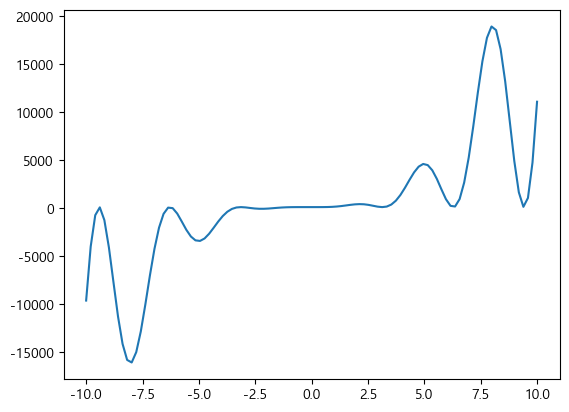

In [4]:
plt.plot(x, y)
plt.show()

In [8]:
X_train = torch.tensor(x, dtype=torch.float32).unsqueeze(dim=1).to(device)
y_train = torch.tensor(y, dtype=torch.float32).unsqueeze(dim=1).to(device)

In [10]:
X_train.shape, y_train.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [32]:
# 모델
model = nn.Sequential(
    nn.Linear(1, 10000),
    nn.ReLU(),
    nn.Linear(10000, 1)
).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)

In [33]:
import time
# 학습
s = time.time()
model.train()
for epoch in range(5000):
    # 추론
    pred = model(X_train)
    # 오차
    loss = loss_fn(pred, y_train)
    # grandient
    loss.backward()
    # 파라미터 업데이트
    optimizer.step()
    # 파라미터 초기화
    optimizer.zero_grad()
e = time.time()
print(e-s)

30.827479124069214


In [34]:
y_pred = model(X_train)

In [35]:
# y_pred 값을 ndarray 변환
## 1. device를 cpu로 이동
## 2. grad_fn 있는 경우 거거
y_pred_array = y_pred.to("cpu").detach().numpy().flatten()
y_pred_array

array([-4.3707739e+03, -5.1399731e+03, -5.9091675e+03, -6.6881060e+03,
       -7.4836729e+03, -8.2792363e+03, -9.0748027e+03, -9.8703750e+03,
       -1.0665937e+04, -1.1461504e+04, -1.2201008e+04, -1.1190352e+04,
       -1.0163159e+04, -9.1359707e+03, -8.1087822e+03, -7.0815923e+03,
       -6.0543979e+03, -5.0272080e+03, -4.0000164e+03, -3.2573523e+03,
       -3.0243352e+03, -2.7913213e+03, -2.5583042e+03, -2.3252896e+03,
       -2.0922749e+03, -1.8592589e+03, -1.6262434e+03, -1.3932277e+03,
       -1.1602125e+03, -9.2719781e+02, -6.9418262e+02, -4.6116724e+02,
       -2.2815208e+02,  4.8640280e+00,  1.0238551e+02,  1.0309682e+02,
        9.5498062e+01,  8.2290421e+01,  6.6628067e+01,  5.0965103e+01,
        3.4842911e+01,  1.7735306e+01, -1.8724144e-01, -1.9318039e+01,
       -4.0710007e+01, -6.3700241e+01, -8.2564255e+01, -8.2820358e+01,
       -6.4109543e+01, -3.1499619e+01, -1.5104836e+00,  2.4818069e+01,
        7.7429398e+01,  1.3426973e+02,  1.8245332e+02,  1.8692201e+02,
      

In [36]:
y_pred_array.shape

(100,)

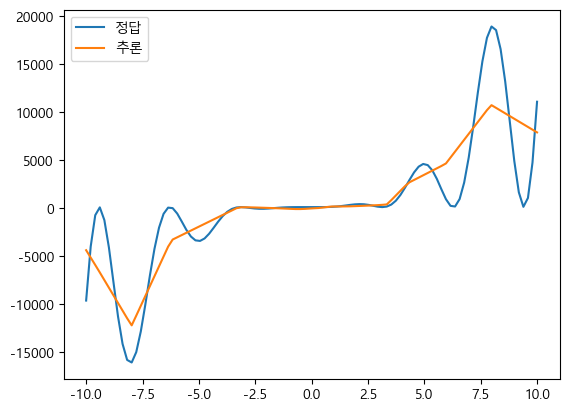

In [37]:
plt.plot(x,y, label="정답")
plt.plot(x,y_pred_array, label="추론")
plt.legend()
plt.show()